# Prediction of Annual Water Usage in Baltimore.

The dataset that used in this program was annual water useage in Baltimore, the purpose of this program is to make a prediction for water usage.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Import Data

### 1. Load the dataset as a Pandas Series and split into two, one for model development (dataset.csv) and the other for validation (validation.csv)


In [2]:
data = pd.read_csv("water.csv", error_bad_lines=False)

data.Year = pd.to_datetime(data.Year, format='%Y')
data = data.rename(columns={'Baltmore city annual water use, liters per capita per day, 1885-1968': 'water'})
data.water = data.water.astype('float64')
data.shape

b'Skipping line 82: expected 2 fields, saw 3\n'


(79, 2)

Set year to index for data, it easier the process in arima

In [3]:
data = data.set_index('Year')
data.head()

,water
Year,
1885-01-01,356.0
1886-01-01,386.0
1887-01-01,397.0
1888-01-01,397.0
1889-01-01,413.0


and the column reduced from 2 to 1

In [4]:
data.shape

(79, 1)

Split data into train and validation

In [5]:
X_train, X_val = train_test_split(data, test_size=0.33, shuffle=False)
len(X_train), len(X_val)

(52, 27)

### 2. Create summary of the dataset, with python function.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79 entries, 1885-01-01 to 1963-01-01
Data columns (total 1 columns):
water    79 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


In [7]:
data.describe()

,water
count,79.000000
mean,512.025316
std,75.685072
min,344.000000
25%,462.000000
50%,503.000000
75%,581.000000
max,662.000000


### GROUP DATA BY DECADE

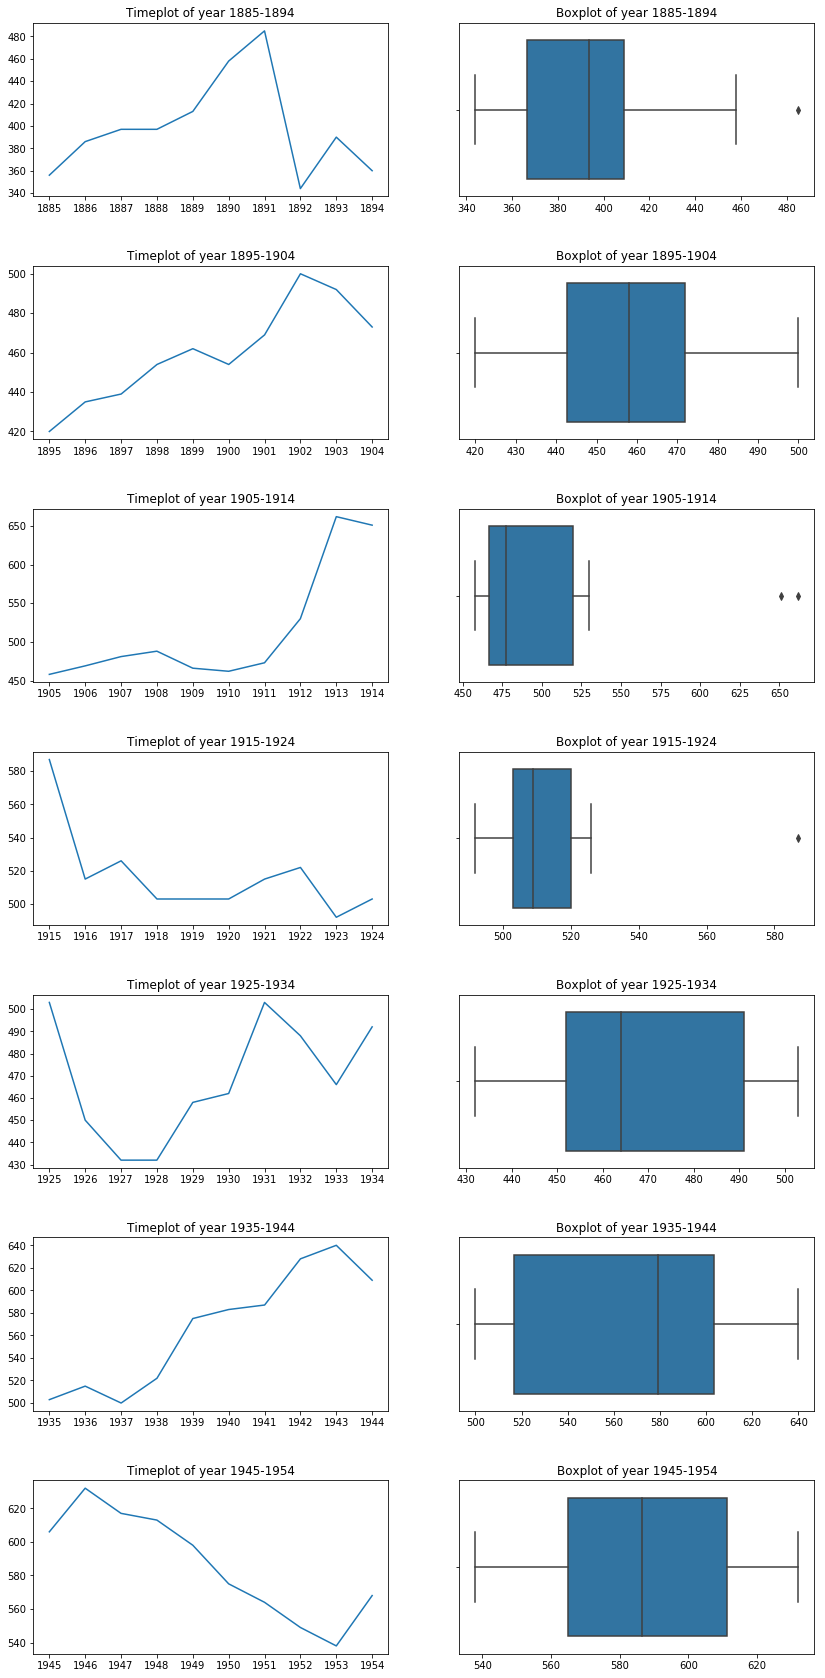

In [8]:
f=plt.figure(figsize=(14,30))

j=1
for i in range(data.shape[0]):
    if (i+1)%10==0 or (i==data.shape[0]):
        f.add_subplot(7,2,j)
        plt.subplots_adjust(hspace=0.4)
        plt.title('Timeplot of year {}-{}'.format(data.index[i-9].year,data.index[i].year))
        plt.plot(data.iloc[list(range(i-9,i+1)),:])
        j+=1
        
        f.add_subplot(7,2,j)
        plt.subplots_adjust(hspace=0.4)
        plt.title('Boxplot of year {}-{}'.format(data.index[i-9].year,data.index[i].year))
        sns.boxplot(data.iloc[list(range(i-9,i+1)),:])
        j+=1
plt.show()

### 3. Create A line plot of a time series dataset, it will provide a lot of insight into the problem.

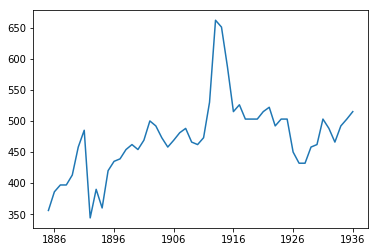

In [9]:
plt.plot(X_train)

**Rolling Statistics** <br>
Dari plot di atas dapat dilihat bahwa plot dari rolling mean dan rolling std berupa garis lurus (tidak memiliki trens ataupun pola tertentu). Sehingga dapat dikatakan bahwa feature water use sudah stationer dalam ragam/varians dan rataan/mean.

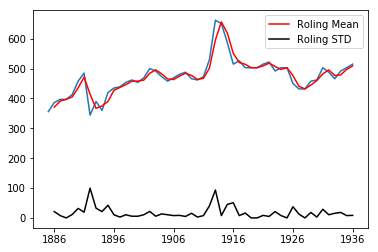

In [10]:
rolmean = X_train.rolling(window=2).mean()
rolstd = X_train.rolling(window=2).std()
plt.plot(X_train)
plt.plot(rolmean,color='red',label='Roling Mean')
plt.plot(rolstd,color='black',label='Roling STD')
plt.legend(loc='best')
plt.show()

**PACF/ ACF **

In [11]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller

print('Dickey-fuller test')
dftest = adfuller(X_train['water'],autolag='AIC')
print(dftest)
dfoutput=pd.Series(dftest[0:4],index=['Test Stat','p-value','lag_used','number of obs used'])
dfoutput

Dickey-fuller test
(-2.7421004965362523, 0.06703204860767971, 1, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, 384.2395531843111)


Test Stat             -2.742100
p-value                0.067032
lag_used               1.000000
number of obs used    50.000000
dtype: float64

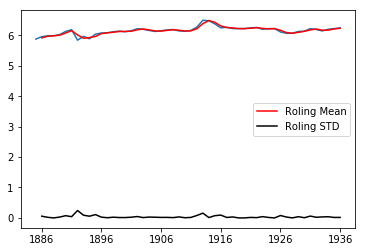

In [12]:
X_train2 = np.log(X_train)
rolmean = X_train2.rolling(window=2).mean()
rolstd = X_train2.rolling(window=2).std()
plt.plot(X_train2)
plt.plot(rolmean,color='red',label='Roling Mean')
plt.plot(rolstd,color='black',label='Roling STD')
plt.legend(loc='best')
plt.show()

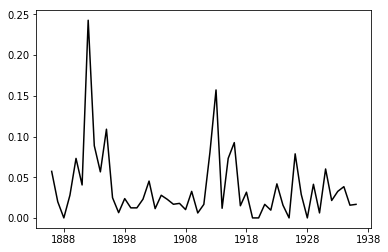

In [13]:
plt.plot(rolstd,color='black',label='Roling STD')

**Dickey-fuller test**

In [14]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller

print('Dickey-fuller test')

dftest = adfuller(X_train2['water'],autolag='AIC')
print(dftest)
dfoutput=pd.Series(dftest[0:4],index=['Test Stat','p-value','lag_used','number of obs used'])
dfoutput

Dickey-fuller test
(-2.617062322142881, 0.0895218585051824, 1, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, -118.98976898960629)


Test Stat             -2.617062
p-value                0.089522
lag_used               1.000000
number of obs used    50.000000
dtype: float64

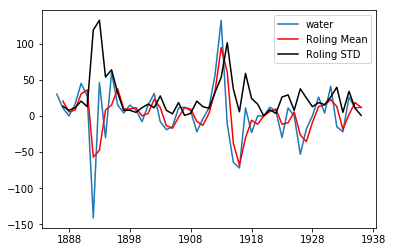

In [15]:
from statsmodels.tsa.stattools import adfuller
diff = X_train['water'] - X_train['water'].shift()
diff = diff.dropna()

rolmean = diff.rolling(window=2).mean()
rolstd = diff.rolling(window=2).std()
plt.plot(diff)
plt.plot(rolmean,color='red',label='Roling Mean')
plt.plot(rolstd,color='black',label='Roling STD')
plt.legend(loc='best')
plt.show()

In [16]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.stattools import adfuller

print('Dickey-fuller test')

dftest = adfuller(diff,autolag='AIC')
print(dftest)
dfoutput = pd.Series(dftest[0:4],index=['Test Stat','p-value','lag_used','number of obs used'])
dfoutput

Dickey-fuller test
(-5.27370010615997, 6.20599989595577e-06, 1, 49, {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}, 381.5868098955805)


Test Stat             -5.273700
p-value                0.000006
lag_used               1.000000
number of obs used    49.000000
dtype: float64

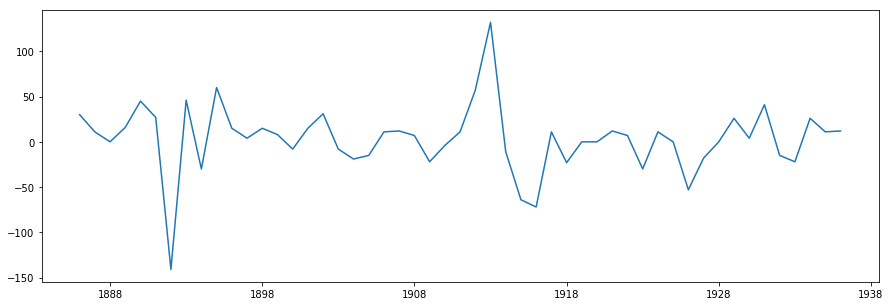

In [17]:
plt.figure(figsize=(15,5))
plt.plot(diff)

** The graph for acf and pacf**

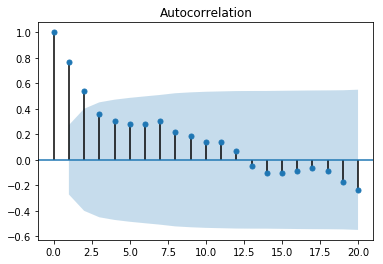

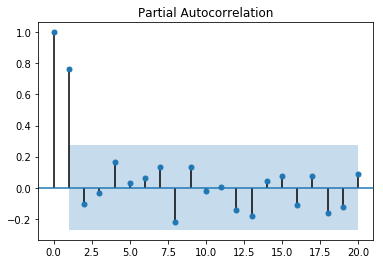

In [18]:
import statsmodels.graphics.tsaplots as sts
sts.plot_acf(X_train, lags=20)
sts.plot_pacf(X_train, lags=20)
plt.show()

### Create models using ARIMA

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error

Plotting ARIMA model


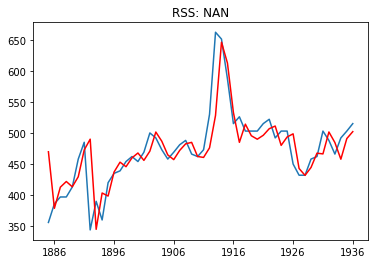

In [20]:
model = ARIMA(X_train, order=(1,0,2))
results = model.fit()
predictions = results.fittedvalues
plt.plot(X_train)
plt.plot(predictions, color='red')
plt.title('RSS: %.4F' % sum((results.fittedvalues-data['water'])**2))
print('Plotting ARIMA model')

In [21]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 540.0820  
Dependent Variable: water            Log-Likelihood:      -260.16   
Date:               2019-10-10 18:47 Scale:               1.0000    
No. Observations:   52               Method:              css-mle   
Df Model:           4                Sample:              01-01-1885
Df Residuals:       48                                    01-01-1936
Converged:          1.0000           S.D. of innovations: 35.619    
AIC:                530.3258         HQIC:                534.066   
---------------------------------------------------------------------
               Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
---------------------------------------------------------------------
const         469.7435   19.1654  24.5100  0.0000  432.1801  507.3069
ar.L1.water     0.6052    0.2371   2.5527  0.0139    0.1405    1.0699
ma.L1.water     0.3533    0.2863   1.2340  0.2232   -0.2078    0.9144
ma.L2.water     0.2330    0.2405   0.9690  0.3374   -0.2383    0.7044
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.6524             0.0000           1.6524             0.0000
MA.1           -0.7579            -1.9278           2.0715            -0.3096
MA.2           -0.7579             1.9278           2.0715             0.3096
====================================================================

"""

Plot prediksi

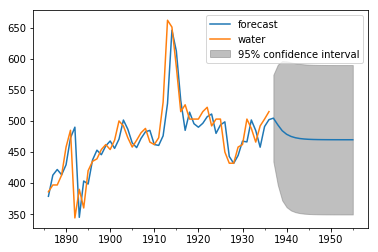

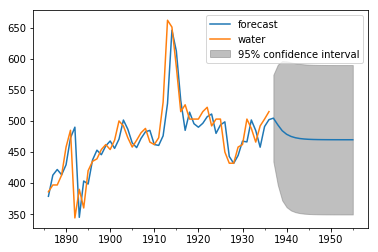

In [22]:
results.plot_predict(1,70)

Pengecekan dengan MAPE dan RMSE

In [23]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(X_train, pd.DataFrame(predictions).round(0))
print('Nilai MAPE dari ARIMA : %.2f%%' % (MAPE))

Nilai MAPE dari ARIMA : 5.25%


In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE = mean_squared_error(X_train, predictions)
RMSE = sqrt(MSE)
print('Nilai RMSE dari model ARIMA : %.2f' % (RMSE))

Nilai RMSE dari model ARIMA : 37.86


Berikut adalah forecasting dengan tujuan untuk pembuktian dengan data validation

In [25]:
x = results.forecast(steps=52+27)

In [26]:
MAPE = mean_absolute_percentage_error(X_val, pd.DataFrame(x[0][52:]).round(0))
print('Nilai MAPE dari ARIMA dengan data validation sebagai pembanding: %.2f%%' % (MAPE))

Nilai MAPE dari ARIMA dengan data validation sebagai pembanding: 19.69%


In [27]:
MSE = mean_squared_error(X_val, x[0][52:])
RMSE = sqrt(MSE)
print('Nilai RMSE dari model ARIMA dengan data validation sebagai pembanding: %.2f' % (RMSE))

Nilai RMSE dari model ARIMA dengan data validation sebagai pembanding: 121.82
